In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [4]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [5]:
NUM_CLASSES = 4

# 入力長

In [6]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [10]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [12]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [13]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 [..............................] - ETA: 19s - loss: 1.4049 - accuracy: 0.2266
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 1s 8ms/step - loss: 1.3848 - accuracy: 0.4494 - val_loss: 1.3661 - val_accuracy: 0.6299
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3742 - accuracy: 0.5078
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.3630 - accuracy: 0.5365 - val_loss: 1.3480 - val_accuracy: 0.6261
Epoch 3/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3465 - accuracy: 0.5547
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.3437 - accuracy: 0.5408 - val_loss: 1.3257 - val_accuracy: 0.6269
Epoch 4/1000
 1/32 [..............................] - ETA: 0s - lo

 1/32 [..............................] - ETA: 0s - loss: 0.7462 - accuracy: 0.7109
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.7636 - val_loss: 0.4372 - val_accuracy: 0.9494
Epoch 28/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6947 - accuracy: 0.8281
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7691 - val_loss: 0.4326 - val_accuracy: 0.9464
Epoch 29/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6284 - accuracy: 0.7656
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.7651 - val_loss: 0.4205 - val_accuracy: 0.9517
Epoch 30/1000
 1/32 [..............................] - ETA: 0s - loss: 0.56

 1/32 [..............................] - ETA: 0s - loss: 0.4617 - accuracy: 0.8359
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.8066 - val_loss: 0.3034 - val_accuracy: 0.9607
Epoch 54/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4635 - accuracy: 0.8203
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.8089 - val_loss: 0.3000 - val_accuracy: 0.9592
Epoch 55/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5968 - accuracy: 0.7812
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.8046 - val_loss: 0.2999 - val_accuracy: 0.9600
Epoch 56/1000
 1/32 [..............................] - ETA: 0s - loss: 0.48

 1/32 [..............................] - ETA: 0s - loss: 0.5055 - accuracy: 0.8516
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.8263 - val_loss: 0.2548 - val_accuracy: 0.9622
Epoch 80/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3836 - accuracy: 0.8281
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.8202 - val_loss: 0.2544 - val_accuracy: 0.9615
Epoch 81/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4904 - accuracy: 0.7969
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.8278 - val_loss: 0.2548 - val_accuracy: 0.9630
Epoch 82/1000
 1/32 [..............................] - ETA: 0s - loss: 0.43

 1/32 [..............................] - ETA: 0s - loss: 0.3631 - accuracy: 0.8516
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.8346 - val_loss: 0.2367 - val_accuracy: 0.9630
Epoch 106/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4380 - accuracy: 0.8672
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.8381 - val_loss: 0.2374 - val_accuracy: 0.9637
Epoch 107/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4882 - accuracy: 0.8594
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.8321 - val_loss: 0.2364 - val_accuracy: 0.9645
Epoch 108/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8828
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.8532 - val_loss: 0.2280 - val_accuracy: 0.9653
Epoch 132/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4622 - accuracy: 0.8125
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8462 - val_loss: 0.2275 - val_accuracy: 0.9645
Epoch 133/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3459 - accuracy: 0.8672
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8467 - val_loss: 0.2255 - val_accuracy: 0.9690
Epoch 134/1000
 1/32 [..............................] - ETA: 0s - loss

 1/32 [..............................] - ETA: 0s - loss: 0.5569 - accuracy: 0.7891
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8457 - val_loss: 0.2269 - val_accuracy: 0.9705
Epoch 158/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5168 - accuracy: 0.8125
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8474 - val_loss: 0.2245 - val_accuracy: 0.9721
Epoch 159/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5232 - accuracy: 0.8672
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.8497 - val_loss: 0.2252 - val_accuracy: 0.9668
Epoch 160/1000
 1/32 [..............................] - ETA: 0s - loss

In [15]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [16]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 81ms/step
[0.93221694 0.02254633 0.01471029 0.03052655]
0


# 混同行列

42/42 [==============================] - 0s 837us/step


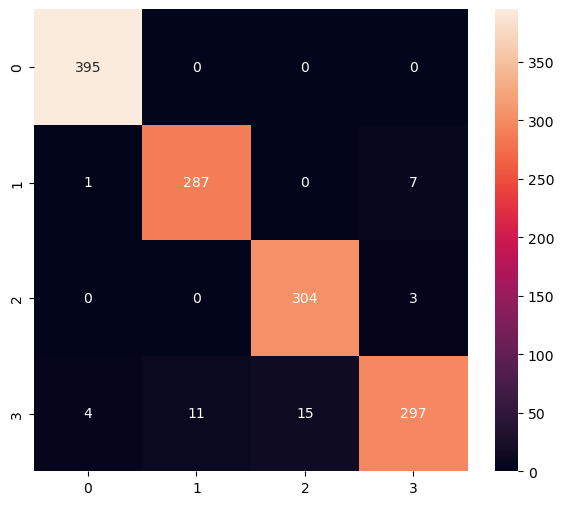

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.96      0.97      0.97       295
           2       0.95      0.99      0.97       307
           3       0.97      0.91      0.94       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [18]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [21]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [22]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asus\AppData\Local\Temp\tmpgnq_ow6v\assets


INFO:tensorflow:Assets written to: C:\Users\asus\AppData\Local\Temp\tmpgnq_ow6v\assets


6432

# 推論テスト

In [23]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [24]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [25]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [26]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1.99 ms


In [27]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.93221694 0.02254633 0.0147103  0.03052655]
0
